In [28]:
!pip install pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv")

In [29]:
print("this dataset has " +str(df.shape[0])+ " rows and " +str(df.shape[1])+" columns.")


this dataset has 212331 rows and 15 columns.


In [30]:
df.columns

Index(['School DBN', 'School Name', 'School Level', 'Regents Exam', 'Year',
       'Total Tested', 'Mean Score', 'Number Scoring Below 65',
       'Percent Scoring Below 65', 'Number Scoring 65 or Above',
       'Percent Scoring 65 or Above', 'Number Scoring 80 or Above',
       'Percent Scoring 80 or Above', 'Number Scoring CR',
       'Percent Scoring CR'],
      dtype='object')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212331 entries, 0 to 212330
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   School DBN                   212331 non-null  object
 1   School Name                  212331 non-null  object
 2   School Level                 212331 non-null  object
 3   Regents Exam                 212321 non-null  object
 4   Year                         212331 non-null  int64 
 5   Total Tested                 212331 non-null  int64 
 6   Mean Score                   212331 non-null  object
 7   Number Scoring Below 65      212331 non-null  object
 8   Percent Scoring Below 65     212331 non-null  object
 9   Number Scoring 65 or Above   212331 non-null  object
 10  Percent Scoring 65 or Above  212331 non-null  object
 11  Number Scoring 80 or Above   212331 non-null  object
 12  Percent Scoring 80 or Above  212331 non-null  object
 13  Number Scoring

In [32]:
#clean and standardize the column names
df.columns = (
    df.columns
    .str.lower()
    .str.strip()
    .str.replace(' ','_')
    .str.replace('-','_')
)


In [33]:
#retrieve column names  after cleaning
for col in df.columns:
  print(col)

school_dbn
school_name
school_level
regents_exam
year
total_tested
mean_score
number_scoring_below_65
percent_scoring_below_65
number_scoring_65_or_above
percent_scoring_65_or_above
number_scoring_80_or_above
percent_scoring_80_or_above
number_scoring_cr
percent_scoring_cr


In [34]:
#select a random subset of rows from Dataset
df.sample(10)

,school_dbn,school_name,school_level,regents_exam,year,total_tested,mean_score,number_scoring_below_65,percent_scoring_below_65,number_scoring_65_or_above,percent_scoring_65_or_above,number_scoring_80_or_above,percent_scoring_80_or_above,number_scoring_cr,percent_scoring_cr
134078,30Q258,Energy Tech High School,High school,Physical Settings/Physics,2017,14,77.2,1,7.1,13,92.9,7,50,na,na
116829,11X288,Collegiate Institute for Math and Science,High school,Common Core Algebra2,2017,62,65.8,20,32.3,42,67.7,4,6.5,42,67.7
110745,07X456,Alfred E. Smith Campus YABC,High school,Common Core Geometry,2017,1,s,s,s,s,s,s,s,na,na
191574,25Q194,J.H.S. 194 William Carr,Junior High-Intermediate-Middle,Common Core Algebra,2015,73,79.2,1,1.4,72,98.6,29,39.7,68,93.2
142199,02M300,"Urban Assembly School of Design and Construction,",High school,Integrated Algebra,2016,4,s,s,s,s,s,s,s,na,na
79628,15K698,South Brooklyn Community High School,High school,Living Environment,2016,17,s,s,s,s,s,s,s,na,na
187110,21K728,Liberation Diploma Plus,High school,Common Core Algebra,2015,7,s,s,s,s,s,s,s,na,na
7218,11X253,Bronx High School for Writing and Communicatio...,High school,Common Core Algebra,2015,78,55.3,60,76.9,18,23.1,0,0,5,6.4
64920,07X520,Foreign Language Academy of Global Studies,High school,Common Core Algebra,2016,16,66.1,5,31.3,11,68.8,1,6.3,8,50
72912,11X270,Academy for Scholarship and Entrepreneurship: ...,High school,Living Environment,2015,129,62.4,71,55,58,45,10,7.8,na,na


In [35]:
#check if there's any null values
df.isnull().sum()


,0
school_dbn,0
school_name,0
school_level,0
regents_exam,10
year,0
total_tested,0
mean_score,0
number_scoring_below_65,0
percent_scoring_below_65,0
number_scoring_65_or_above,0


In [36]:
#calculate the total number of missing values
missing_values=df.isnull().sum()
#filter out columns that have at least one missing values
columns_with_missing_values = missing_values[missing_values >0]
print(f"columns with missing values: {columns_with_missing_values}")


columns with missing values: regents_exam    10
dtype: int64


In [37]:
#retrieve rows that  contain at least one null value
null_values =df[df.isnull().any(axis=1)]
print(null_values)


       school_dbn                                   school_name  \
18654      84M478  Inwood Academy for Leadership Charter School   
52756      84M478  Inwood Academy for Leadership Charter School   
52757      84M478  Inwood Academy for Leadership Charter School   
100865     84M478  Inwood Academy for Leadership Charter School   
100866     84M478  Inwood Academy for Leadership Charter School   
100867     84M478  Inwood Academy for Leadership Charter School   
138300     84M478  Inwood Academy for Leadership Charter School   
138301     84M478  Inwood Academy for Leadership Charter School   
209785     84M478  Inwood Academy for Leadership Charter School   
209786     84M478  Inwood Academy for Leadership Charter School   

            school_level regents_exam  year  total_tested mean_score  \
18654   Secondary School          NaN  2015            90       55.6   
52756   Secondary School          NaN  2015            81       55.9   
52757   Secondary School          NaN  2015   

In [38]:
#replace "s" and "na" by null values
df.replace({"s": np.nan, "na": np.nan}, inplace= True)

In [39]:
#retrieve rows that  contain null values
null_values =df[df.isnull().any(axis=1)]
print(null_values)

       school_dbn                     school_name school_level  \
0          01M034  P.S. 034 Franklin D. Roosevelt          K-8   
1          01M034  P.S. 034 Franklin D. Roosevelt          K-8   
2          01M034  P.S. 034 Franklin D. Roosevelt          K-8   
3          01M140          P.S. 140 Nathan Straus          K-8   
4          01M140          P.S. 140 Nathan Straus          K-8   
...           ...                             ...          ...   
212326     84X717            Icahn Charter School          K-8   
212327     84X717            Icahn Charter School          K-8   
212328     84X717            Icahn Charter School          K-8   
212329     84X717            Icahn Charter School          K-8   
212330     84X717            Icahn Charter School          K-8   

                       regents_exam  year  total_tested mean_score  \
0               Common Core Algebra  2017             4        NaN   
1                Living Environment  2015            16       77.9 

In [40]:
#remove all null values
df.dropna(inplace=True)

In [41]:
df.isnull().sum()

,0
school_dbn,0
school_name,0
school_level,0
regents_exam,0
year,0
total_tested,0
mean_score,0
number_scoring_below_65,0
percent_scoring_below_65,0
number_scoring_65_or_above,0


In [42]:
print(df.isnull().sum().sum())


0


In [43]:
#display the new shapeof dataset
df.shape

(69643, 15)

In [44]:
#remove all duplicate rows from dataset
df = df.drop_duplicates()

In [45]:
#display the shape after removing duplicates
df.shape

(67602, 15)

In [46]:
#generate summary statistics for numerical columns
df.describe()

,year,total_tested
count,67602.000000,67602.000000
mean,2015.898006,69.494601
std,0.799492,106.637434
min,2015.000000,6.000000
25%,2015.000000,17.000000
50%,2016.000000,37.000000
75%,2017.000000,79.000000
max,2017.000000,1554.000000


In [47]:
#Identify columns that are non-numeric (objet type)
#because describe() does not display statistics for them
for col in df.columns:
   if df[col].dtypes == "objet":
       print(f"column {col} contains non-numeric values ")

In [49]:
# convert  specific columns to numeric  data types
#for proper statistical analysis
columns_to_convert = [
   'mean_score', 'number_scoring_below_65', 'percent_scoring_below_65',
   'number_scoring_65_or_above',  'percent_scoring_65_or_above',
   'number_scoring_80_or_above', 'percent_scoring_80_or_above',
   'number_scoring_cr', 'percent_scoring_cr'
]
for col in columns_to_convert:
 df[col] = pd. to_numeric(df[col], errors="coerce")
print(df.dtypes)

school_dbn                      object
school_name                     object
school_level                    object
regents_exam                    object
year                             int64
total_tested                     int64
mean_score                     float64
number_scoring_below_65          int64
percent_scoring_below_65       float64
number_scoring_65_or_above       int64
percent_scoring_65_or_above    float64
number_scoring_80_or_above       int64
percent_scoring_80_or_above    float64
number_scoring_cr                int64
percent_scoring_cr             float64
dtype: object


In [50]:
df.describe()

,year,total_tested,mean_score,number_scoring_below_65,percent_scoring_below_65,number_scoring_65_or_above,percent_scoring_65_or_above,number_scoring_80_or_above,percent_scoring_80_or_above,number_scoring_cr,percent_scoring_cr
count,67602.000000,67602.000000,67602.000000,67602.000000,67602.000000,67602.000000,67602.000000,67602.000000,67602.000000,67602.000000,67602.000000
mean,2015.898006,69.494601,65.033211,24.962368,43.146803,44.532233,56.854735,17.854279,20.096305,30.360256,36.128675
std,0.799492,106.637434,11.229314,38.038172,29.350178,83.889913,29.349966,53.002063,25.575245,69.113377,30.907601
min,2015.000000,6.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,17.000000,57.500000,5.000000,17.900000,7.000000,33.300000,0.000000,0.000000,2.000000,9.100000
50%,2016.000000,37.000000,64.700000,12.000000,41.000000,19.000000,59.000000,3.000000,9.100000,9.000000,29.000000
75%,2017.000000,79.000000,72.400000,30.000000,66.700000,50.000000,82.100000,14.000000,30.300000,31.000000,58.400000
max,2017.000000,1554.000000,98.300000,697.000000,100.000000,1497.000000,100.000000,1318.000000,100.000000,1465.000000,100.000000


In [51]:
#create a copy of the cleaned dataset to store in a new variable
cleaned_df = df

In [57]:
#saving the claned dataset as csv fil in the current directory
cleaned_df.to_csv('cleaned_dataset.csv', index= False)

In [58]:
cleaned_df.sample(10)

,school_dbn,school_name,school_level,regents_exam,year,total_tested,mean_score,number_scoring_below_65,percent_scoring_below_65,number_scoring_65_or_above,percent_scoring_65_or_above,number_scoring_80_or_above,percent_scoring_80_or_above,number_scoring_cr,percent_scoring_cr
47731,28Q690,High School for Law Enforcement and Public Safety,High school,Integrated Algebra,2016,12,56.4,8,66.7,4,33.3,0,0.0,0,0.0
3924,07X029,P.S./M.S. 029 Melrose School,K-8,Common Core Algebra,2016,29,66.5,11,37.9,18,62.1,2,6.9,15,51.7
209453,84M350,Democracy Prep Charter School,K-12 all grades,Algebra2/Trigonometry,2015,73,72.0,11,15.1,62,84.9,14,19.2,14,19.2
37521,16K455,Boys and Girls High School,High school,Common Core English,2016,28,45.0,18,64.3,10,35.7,1,3.6,3,10.7
6515,10X368,In-Tech Academy (M.S. / High School 368),Secondary School,Integrated Algebra,2016,13,59.5,10,76.9,3,23.1,0,0.0,0,0.0
15496,28Q328,High School for Community Leadership,High school,English,2015,93,80.3,3,3.2,90,96.8,54,58.1,71,76.3
195632,27Q308,Robert H. Goddard High School of Communication...,High school,Geometry,2015,53,69.2,15,28.3,38,71.7,15,28.3,15,28.3
53396,84X200,ROADS Charter School II,High school,Common Core Algebra,2015,18,43.9,18,100.0,0,0.0,0,0.0,0,0.0
153971,06M211,Inwood Early College for Health and Informatio...,High school,Common Core Algebra,2017,93,66.6,29,31.2,64,68.8,5,5.4,43,46.2
101167,84M709,Harlem Village Academy Charter School,K-12 all grades,Common Core English,2016,77,73.9,17,22.1,60,77.9,31,40.3,40,51.9


In [59]:
#extract the first two characters of "school_dbn" to represent district_code
cleaned_df["district_code"]=cleaned_df["school_dbn"].str[:2]
#extract the third character of "school_dbn" to represent borough_code
cleaned_df['borough_code']=cleaned_df['school_dbn'].str[2]
#extract the remaining characters starting from the fourth character as the school_code
cleaned_df['school_code']=cleaned_df['school_dbn'].str[3]
cleaned_df.sample(10)


,school_dbn,school_name,school_level,regents_exam,year,total_tested,mean_score,number_scoring_below_65,percent_scoring_below_65,number_scoring_65_or_above,percent_scoring_65_or_above,number_scoring_80_or_above,percent_scoring_80_or_above,number_scoring_cr,percent_scoring_cr,district_code,borough_code,school_code
115150,10X353,World View High School,High school,Common Core English,2015,10,71.4,2,20.0,8,80.0,3,30.0,3,30.0,10,X,3
132804,28Q686,Queens Metropolitan High School,High school,Algebra2/Trigonometry,2016,48,52.4,37,77.1,11,22.9,4,8.3,4,8.3,28,Q,6
131815,27Q480,John Adams High School,High school,Integrated Algebra,2015,316,66.0,138,43.7,178,56.3,48,15.2,48,15.2,27,Q,4
151707,04M372,Esperanza Preparatory Academy,Secondary School,Common Core Geometry,2016,6,51.0,6,100.0,0,0.0,0,0.0,0,0.0,04,M,3
120812,14K923,Automotive High School Yabc,High school,Common Core English,2017,13,39.4,11,84.6,2,15.4,0,0.0,1,7.7,14,K,9
131235,27Q308,Robert H. Goddard High School of Communication...,High school,Integrated Algebra,2015,53,72.1,7,13.2,46,86.8,9,17.0,9,17.0,27,Q,3
131405,27Q323,Scholars' Academy,Secondary School,Geometry,2015,65,86.9,0,0.0,65,100.0,54,83.1,54,83.1,27,Q,3
130581,26Q435,Martin Van Buren High School,High school,Common Core Algebra2,2016,24,64.1,12,50.0,12,50.0,3,12.5,12,50.0,26,Q,4
60149,02M655,Life Sciences Secondary School,Secondary School,English,2015,77,69.3,20,26.0,57,74.0,21,27.3,28,36.4,02,M,6
26090,06M348,Washington Heights Expeditionary Learning School,K-12 all grades,English,2015,10,68.5,4,40.0,6,60.0,2,20.0,4,40.0,06,M,3


In [66]:
#define a dictionary to map borough codes to their respective borough names
borough = {
    "M": "Manhattan",
    "X": "Bronx",
    "K": "Brooklyn",
    "Q": "Queens",
    "R": "Staten Island"
}
#function to get the borough name from the borough code
def get_borough(x):
  return borough[x]
#map the borough codes in 'borough_code' column to their actual borough names
cleaned_df["borough"] = cleaned_df["borough_code"].map(get_borough)
cleaned_df.sample(10)

,school_dbn,school_name,school_level,regents_exam,year,total_tested,mean_score,number_scoring_below_65,percent_scoring_below_65,number_scoring_65_or_above,percent_scoring_65_or_above,number_scoring_80_or_above,percent_scoring_80_or_above,number_scoring_cr,percent_scoring_cr,district_code,borough_code,school_code,borough
4191,07X500,Hostos-Lincoln Academy of Science,Secondary School,Common Core Algebra,2016,87,70.0,18,20.7,69,79.3,6,6.9,46,52.9,07,X,5,Bronx
198535,28Q440,Forest Hills High School,High school,Common Core Algebra,2016,318,70.8,71,22.3,247,77.7,62,19.5,199,62.6,28,Q,4,Queens
140818,01M696,Bard High School Early College,High school,Common Core Algebra,2015,13,72.1,1,7.7,12,92.3,1,7.7,9,69.2,01,M,6,Manhattan
129532,25Q241,Queens High School for Language Studies,High school,Common Core Geometry,2017,55,67.4,18,32.7,37,67.3,10,18.2,26,47.3,25,Q,2,Queens
137158,84K707,Brooklyn Prospect Charter School,K-12 all grades,English,2015,24,75.9,6,25.0,18,75.0,13,54.2,14,58.3,84,K,7,Brooklyn
167902,11X418,Bronx High School for the Visual Arts,High school,English,2015,23,59.5,7,30.4,16,69.6,1,4.3,6,26.1,11,X,4,Bronx
105896,02M500,Unity Center for Urban Technologies,High school,Geometry,2015,12,65.9,7,58.3,5,41.7,2,16.7,2,16.7,02,M,5,Manhattan
13938,24Q744,VOYAGES Preparatory,High school,Integrated Algebra,2015,60,69.3,12,20.0,48,80.0,3,5.0,3,5.0,24,Q,7,Queens
85520,21K228,I.S. 228 David A. Boody,Junior High-Intermediate-Middle,Common Core Algebra,2016,45,87.1,0,0.0,45,100.0,45,100.0,45,100.0,21,K,2,Brooklyn
123183,17K546,High School for Public Service: Heroes of Tomo...,High school,Common Core Geometry,2017,34,58.0,22,64.7,12,35.3,1,2.9,7,20.6,17,K,5,Brooklyn


In [68]:
# select 'Khalil Gibran International Academy' to compare its performance with other schools
school_N = 'Khalil Gibran International Academy'
selected_school = cleaned_df[cleaned_df['school_name'] == school_N]
print(selected_school)

       school_dbn                          school_name school_level  \
9775       15K592  Khalil Gibran International Academy  High school   
9776       15K592  Khalil Gibran International Academy  High school   
9777       15K592  Khalil Gibran International Academy  High school   
9778       15K592  Khalil Gibran International Academy  High school   
9779       15K592  Khalil Gibran International Academy  High school   
...           ...                                  ...          ...   
176445     15K592  Khalil Gibran International Academy  High school   
176446     15K592  Khalil Gibran International Academy  High school   
176465     15K592  Khalil Gibran International Academy  High school   
176467     15K592  Khalil Gibran International Academy  High school   
176469     15K592  Khalil Gibran International Academy  High school   

                 regents_exam  year  total_tested  mean_score  \
9775    Algebra2/Trigonometry  2015            33        53.8   
9776    Algebra2/

In [74]:
#compare  mean score of selected_school with overall mean score
overall_mean_score = cleaned_df["mean_score"].mean()
selected_school_mean = selected_school["mean_score"].mean()
print(f"overall mean score is : {overall_mean_score:.2f}")
print(f"mean score of {school_N} is : {selected_school_mean:.2f}")



overall mean score is : 65.03
mean score of Khalil Gibran International Academy is : 60.65


In [78]:
#compare mean score of selected school with schools over the district
#get the name's borough of the selected school
selected_borough = selected_school["borough"].values[0]
#filter schools from the same borough of selected school
same_borough_schools = cleaned_df[cleaned_df["borough"] == selected_borough]
#compute the mean score of schools in the same borough
borough_mean_score = same_borough_schools["mean_score"].mean()
#display comparison between selected school and schools in the same borough
print(f"Mean score of {school_N} is : {selected_school_mean:2f}")
print(f"Mean score in {selected_borough} is : {borough_mean_score:.2f}")

Mean score of Khalil Gibran International Academy is : 60.648936
Mean score in Brooklyn is : 63.92


In [80]:
#compare mean score of selected school with schools over the district
#get the name's district of the selected school
selected_district = selected_school["district_code"].values[0]
#filter schools from the same district of selected school
same_district_schools = cleaned_df[cleaned_df["district_code"] == selected_district]
#compute the mean score of schools in the same district
district_mean_score = same_district_schools["mean_score"].mean()
#display comparison between selected school and schools in the same district
print(f"Mean score of {school_N} is : {selected_school_mean:2f}")
print(f"Mean score in district {selected_district} is : {district_mean_score:.2f}")

Mean score of Khalil Gibran International Academy is : 60.648936
Mean score in district 15 is : 63.27


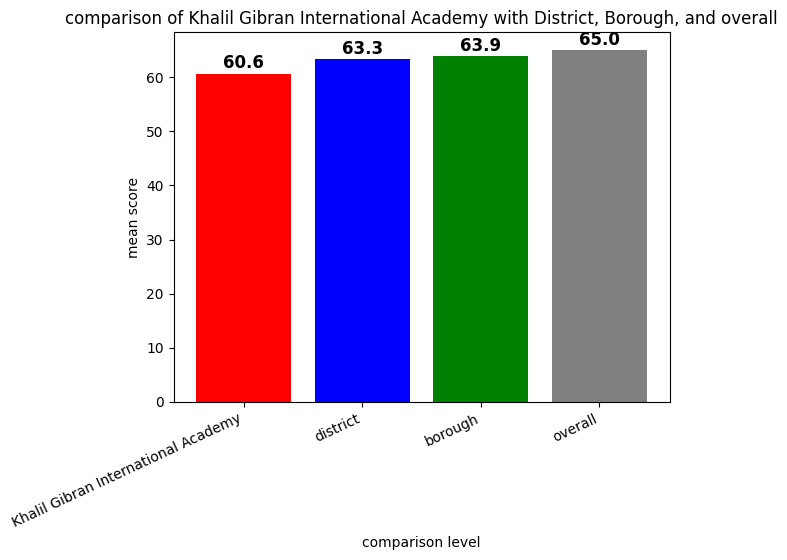

In [88]:
#visualisation
categories = [school_N, "district", "borough", "overall"]
scores = [selected_school_mean, district_mean_score, borough_mean_score, overall_mean_score]
#create bar chart
plt.bar(categories, scores, color=['red', 'blue', 'green', 'gray'])
#add values on top of bars
for i, v in enumerate(scores):
  plt.text(i, v + 1, f"{v :.1f}", ha='center', fontsize=12, fontweight='bold')
plt.xticks(rotation=25, ha="right")
#add labels and title
plt.xlabel("comparison level")
plt.ylabel("mean score")
plt.title(f"comparison of {school_N} with District, Borough, and overall")
#show the plot
plt.show()

In [77]:
# mean score by borough
cleaned_df.groupby("borough")["mean_score"].mean()

,mean_score
borough,
Bronx,62.189547
Brooklyn,63.918106
Manhattan,67.120586
Queens,67.389102
Staten Island,67.415736


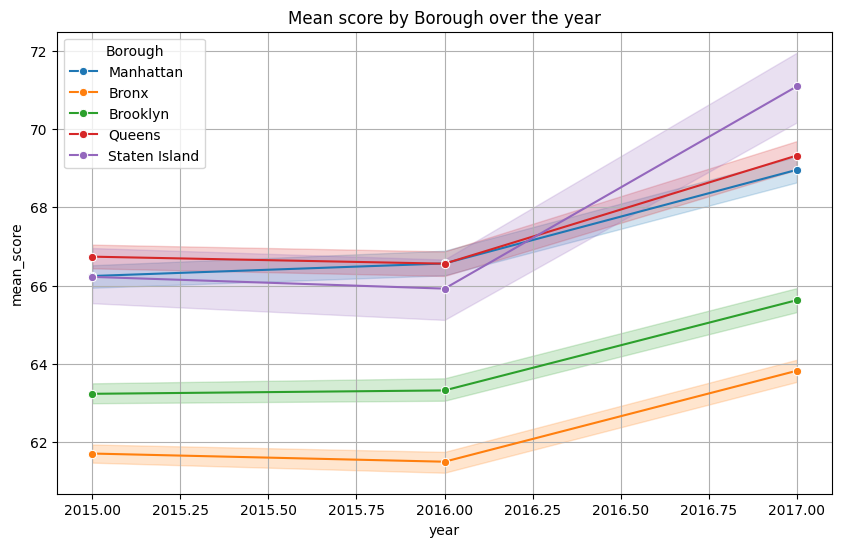

In [89]:
import seaborn as sns
#create the line plot
plt.figure(figsize=(10,6))
sns.lineplot(data=cleaned_df, x="year", y="mean_score", hue="borough", marker="o")
#customize the chart
plt.xlabel("year")
plt.ylabel("mean_score")
plt.title("Mean score by Borough over the year")
plt.legend(title="Borough")
plt.grid(True)
#show the plt.plot
plt.show()

In [90]:
#check if any relation between total_tested and mean_score
correlation = cleaned_df["total_tested"].corr(cleaned_df["mean_score"])
print(f"Correlation between total tested and mean score : {correlation:.2f}")


Correlation between total tested and mean score : 0.17


In [91]:
#check if the total_tested impact borough_mean_score
cleaned_df.groupby("borough")[["total_tested", "mean_score"]].corr().unstack().iloc[:,1]

,total_tested
,mean_score
borough,
Bronx,0.206541
Brooklyn,0.204514
Manhattan,0.208877
Queens,0.100828
Staten Island,0.079660
